In [156]:
library('fPortfolio')
library('timeSeries')
library(forecast)
library(dplyr)
library(data.table)
library('useful')
library("corrplot")
source("http://www.sthda.com/upload/rquery_cormat.r")


# Index

1.  EDA

2.  [Trend](#Trend) <a id='Trend'></a>
    
    2.1 Problem-1
    
    2.2 Problem-2    
    
3.  [Building Efficient Frontier](#Building_Efficient_Frontier) <a id='Building_Efficient_Frontier'></a>
    
    3.1 Problem-3
    
    3.2 Problem-4
    
    3.3 Problem-5
    
    3.4 Problem-6

#  1. EDA

EDA was done to check Correlationg among Asset prices and monthly rolling returns for last 4yrs, 1yr and current FY

In [117]:
data=read.csv("ALLDATA.csv")
data=data[,-c(1)]

In [103]:
cor(data, method = c("pearson", "kendall", "spearman"))

,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,ASSET_10,ASSET_11
ASSET_1,1.00000000,0.04364178,-0.2026482,-0.2200610,-0.4600777,0.93922736,0.8519681,0.15258133,0.78441198,0.07936889,0.4975022
ASSET_2,0.04364178,1.00000000,0.9481759,0.7968290,0.5631225,-0.07684331,0.3994836,-0.72222480,0.17568099,0.99685810,0.7491528
ASSET_3,-0.20264817,0.94817587,1.0000000,0.8886395,0.7292148,-0.35616141,0.1659371,-0.70131556,-0.12447359,0.93010318,0.6360670
ASSET_4,-0.22006097,0.79682899,0.8886395,1.0000000,0.8188048,-0.41783830,0.1295033,-0.54102483,-0.29167270,0.78737169,0.4838278
ASSET_5,-0.46007775,0.56312248,0.7292148,0.8188048,1.0000000,-0.62812865,-0.1738727,-0.23576232,-0.55998667,0.55407055,0.1690376
ASSET_6,0.93922736,-0.07684331,-0.3561614,-0.4178383,-0.6281287,1.00000000,0.7757779,0.15922639,0.86398476,-0.03674004,0.3766382
ASSET_7,0.85196805,0.39948360,0.1659371,0.1295033,-0.1738727,0.77577794,1.0000000,-0.18516651,0.73523426,0.42913342,0.6966305
ASSET_8,0.15258133,-0.72222480,-0.7013156,-0.5410248,-0.2357623,0.15922639,-0.1851665,1.00000000,-0.03791683,-0.70992627,-0.5546499
ASSET_9,0.78441198,0.17568099,-0.1244736,-0.2916727,-0.5599867,0.86398476,0.7352343,-0.03791683,1.00000000,0.20079107,0.4218891
ASSET_10,0.07936889,0.99685810,0.9301032,0.7873717,0.5540705,-0.03674004,0.4291334,-0.70992627,0.20079107,1.00000000,0.7503765


$r
         ASSET_4 ASSET_5 ASSET_11 ASSET_3 ASSET_2 ASSET_10 ASSET_8 ASSET_9
ASSET_4     1.00    0.82     0.48    0.89   0.800    0.790  -0.540  -0.290
ASSET_5     0.82    1.00     0.17    0.73   0.560    0.550  -0.240  -0.560
ASSET_11    0.48    0.17     1.00    0.64   0.750    0.750  -0.550   0.420
ASSET_3     0.89    0.73     0.64    1.00   0.950    0.930  -0.700  -0.120
ASSET_2     0.80    0.56     0.75    0.95   1.000    1.000  -0.720   0.180
ASSET_10    0.79    0.55     0.75    0.93   1.000    1.000  -0.710   0.200
ASSET_8    -0.54   -0.24    -0.55   -0.70  -0.720   -0.710   1.000  -0.038
ASSET_9    -0.29   -0.56     0.42   -0.12   0.180    0.200  -0.038   1.000
ASSET_7     0.13   -0.17     0.70    0.17   0.400    0.430  -0.190   0.740
ASSET_1    -0.22   -0.46     0.50   -0.20   0.044    0.079   0.150   0.780
ASSET_6    -0.42   -0.63     0.38   -0.36  -0.077   -0.037   0.160   0.860
         ASSET_7 ASSET_1 ASSET_6
ASSET_4     0.13  -0.220  -0.420
ASSET_5    -0.17  -0.460  -0.63

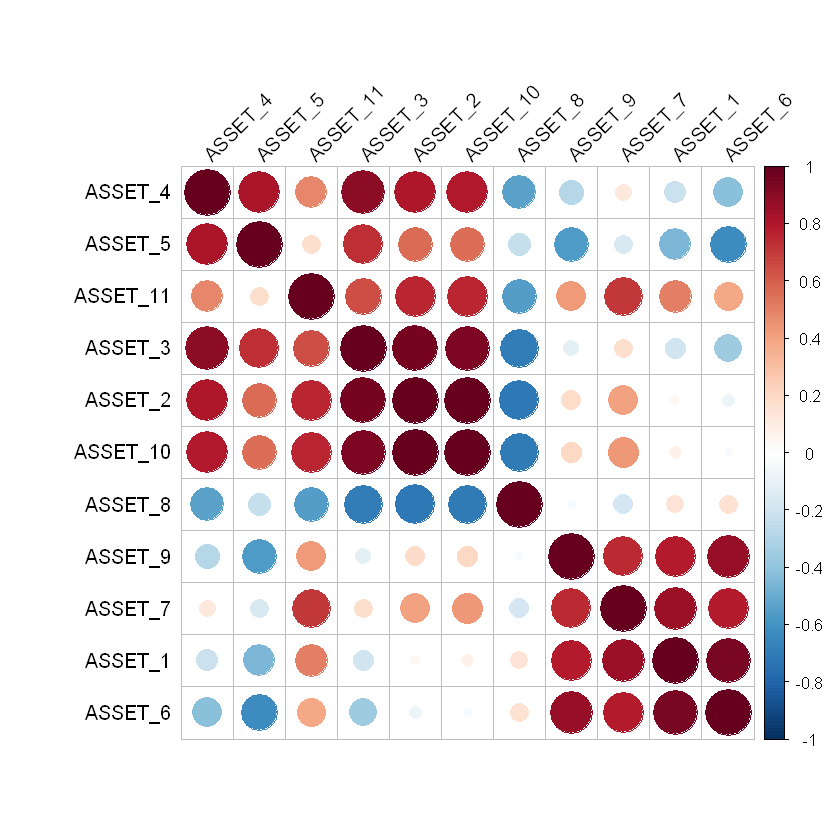

In [114]:
#finding Corr matrix and building heatmap of same
rquery.cormat(data,type='full')

In [128]:
# Preparing data frame for finding Monthly rolling returns
data_assets_exp=shift.column(data=data,columns=names(data),len= 20, up = TRUE)
colnames(data_assets_exp)
columns_exp=colnames(data_assets_exp)
columns_exp[12:22]

[1] "ASSET_1"          "ASSET_2"          "ASSET_3"          "ASSET_4"         
 [5] "ASSET_5"          "ASSET_6"          "ASSET_7"          "ASSET_8"         
 [9] "ASSET_9"          "ASSET_10"         "ASSET_11"         "ASSET_1.Shifted" 
[13] "ASSET_2.Shifted"  "ASSET_3.Shifted"  "ASSET_4.Shifted"  "ASSET_5.Shifted" 
[17] "ASSET_6.Shifted"  "ASSET_7.Shifted"  "ASSET_8.Shifted"  "ASSET_9.Shifted" 
[21] "ASSET_10.Shifted" "ASSET_11.Shifted"

[1] "ASSET_1.Shifted"  "ASSET_2.Shifted"  "ASSET_3.Shifted"  "ASSET_4.Shifted" 
 [5] "ASSET_5.Shifted"  "ASSET_6.Shifted"  "ASSET_7.Shifted"  "ASSET_8.Shifted" 
 [9] "ASSET_9.Shifted"  "ASSET_10.Shifted" "ASSET_11.Shifted"

In [130]:
#Adding Mon roll column separately
data_assets_exp$A1_Mon_roll= data_assets_exp$ASSET_1/data_assets_exp$ASSET_1.Shifted-1
data_assets_exp$A2_Mon_roll= data_assets_exp$ASSET_2/data_assets_exp$ASSET_2.Shifted-1
data_assets_exp$A3_Mon_roll= data_assets_exp$ASSET_3/data_assets_exp$ASSET_3.Shifted-1
data_assets_exp$A4_Mon_roll= data_assets_exp$ASSET_4/data_assets_exp$ASSET_4.Shifted-1
data_assets_exp$A5_Mon_roll= data_assets_exp$ASSET_5/data_assets_exp$ASSET_5.Shifted-1
data_assets_exp$A6_Mon_roll= data_assets_exp$ASSET_6/data_assets_exp$ASSET_6.Shifted-1
data_assets_exp$A7_Mon_roll= data_assets_exp$ASSET_7/data_assets_exp$ASSET_7.Shifted-1
data_assets_exp$A8_Mon_roll= data_assets_exp$ASSET_8/data_assets_exp$ASSET_8.Shifted-1
data_assets_exp$A9_Mon_roll= data_assets_exp$ASSET_9/data_assets_exp$ASSET_9.Shifted-1
data_assets_exp$A10_Mon_roll= data_assets_exp$ASSET_10/data_assets_exp$ASSET_10.Shifted-1
data_assets_exp$A11_Mon_roll= data_assets_exp$ASSET_11/data_assets_exp$ASSET_11.Shifted-1

new_col=list()
i=1
while (i<12)
{
new_col[i]= paste("Monthly Roll- Asset:",format(i))
i=i+1
}

In [131]:
data_assets_exp=shift.column(data=data_assets_exp, columns=names(data),newNames = new_col ,len= 20,up = FALSE)
names(data_assets_exp)

[1] "ASSET_1"                 "ASSET_2"                
 [3] "ASSET_3"                 "ASSET_4"                
 [5] "ASSET_5"                 "ASSET_6"                
 [7] "ASSET_7"                 "ASSET_8"                
 [9] "ASSET_9"                 "ASSET_10"               
[11] "ASSET_11"                "ASSET_1.Shifted"        
[13] "ASSET_2.Shifted"         "ASSET_3.Shifted"        
[15] "ASSET_4.Shifted"         "ASSET_5.Shifted"        
[17] "ASSET_6.Shifted"         "ASSET_7.Shifted"        
[19] "ASSET_8.Shifted"         "ASSET_9.Shifted"        
[21] "ASSET_10.Shifted"        "ASSET_11.Shifted"       
[23] "A1_Mon_roll"             "A2_Mon_roll"            
[25] "A3_Mon_roll"             "A4_Mon_roll"            
[27] "A5_Mon_roll"             "A6_Mon_roll"            
[29] "A7_Mon_roll"             "A8_Mon_roll"            
[31] "A9_Mon_roll"             "A10_Mon_roll"           
[33] "A11_Mon_roll"            "Monthly Roll- Asset: 1" 
[35] "Monthly Roll- Asset: 2"  "Monthly Roll- Asset: 3" 
[37] "Monthly Roll- Asset: 4"  "Monthly Roll- Asset: 5" 
[39] "Monthly Roll- Asset: 6"  "Monthly Roll- Asset: 7" 
[41] "Monthly Roll- Asset: 8"  "Monthly Roll- Asset: 9" 
[43] "Monthly Roll- Asset: 10" "Monthly Roll- Asset: 11"

In [137]:
data_assets_mon_roll= data_assets_exp[,-c(1:22)]
data_assets_mon_roll= data_assets_mon_roll[,-c(12:22)]
head(data_assets_mon_roll)

,A1_Mon_roll,A2_Mon_roll,A3_Mon_roll,A4_Mon_roll,A5_Mon_roll,A6_Mon_roll,A7_Mon_roll,A8_Mon_roll,A9_Mon_roll,A10_Mon_roll,A11_Mon_roll
21,0.02428599,-0.027423368,-0.0307803373,0.003408903,0.02381908,-0.07884514,0.01650694,0.0018160887,0.09207121,-0.0379929104,-0.05674979
22,0.01711330,-0.032217267,-0.0369337929,0.014681202,0.04244007,-0.07351800,0.02679725,0.0058880253,0.06478716,-0.0421992883,-0.01906117
23,0.02406895,-0.022670281,-0.0280403002,0.014160560,0.03891170,-0.06262455,0.06146226,-0.0003371395,0.05832073,-0.0330413763,-0.04449388
24,0.02659551,0.004340411,-0.0004636342,0.023364784,0.02350693,-0.04715029,0.07961925,0.0066379157,0.13902489,-0.0095134335,-0.05301543
25,0.03968072,0.013466655,0.0033214481,0.008703375,0.02427477,-0.04524651,0.07995077,0.0195200824,0.17860181,-0.0036327242,-0.04236565
26,0.03685247,0.016522881,0.0049921138,-0.022964411,0.03432847,-0.03761375,0.07197957,0.0206917005,0.17796531,-0.0008605322,-0.03847258


In [138]:
#looking at summary of entire dataset
summary(data_assets_mon_roll)

  A1_Mon_roll         A2_Mon_roll         A3_Mon_roll       
 Min.   :-0.181419   Min.   :-0.216689   Min.   :-0.202892  
 1st Qu.:-0.043333   1st Qu.:-0.044896   1st Qu.:-0.044541  
 Median :-0.008332   Median :-0.016663   Median :-0.018487  
 Mean   : 0.003910   Mean   :-0.003235   Mean   :-0.007023  
 3rd Qu.: 0.029269   3rd Qu.: 0.018108   3rd Qu.: 0.013851  
 Max.   : 0.663871   Max.   : 0.829028   Max.   : 0.748557  
  A4_Mon_roll         A5_Mon_roll         A6_Mon_roll        
 Min.   :-0.190408   Min.   :-0.182259   Min.   :-0.2305942  
 1st Qu.:-0.037190   1st Qu.:-0.044184   1st Qu.:-0.0401676  
 Median :-0.009591   Median :-0.015672   Median : 0.0007974  
 Mean   :-0.006186   Mean   :-0.009614   Mean   : 0.0135329  
 3rd Qu.: 0.019187   3rd Qu.: 0.019301   3rd Qu.: 0.0519885  
 Max.   : 0.321437   Max.   : 0.489266   Max.   : 0.8433130  
  A7_Mon_roll         A8_Mon_roll         A9_Mon_roll        A10_Mon_roll      
 Min.   :-0.180111   Min.   :-0.324228   Min.   :-0.28457  

In [141]:
#Retaining data for last one year only
data_assets_mon_roll_lastyr=data_assets_mon_roll[-c(1:867),]
summary(data_assets_mon_roll_lastyr)

  A1_Mon_roll        A2_Mon_roll        A3_Mon_roll        A4_Mon_roll       
 Min.   :-0.18142   Min.   :-0.21669   Min.   :-0.20289   Min.   :-0.190408  
 1st Qu.:-0.07068   1st Qu.:-0.05555   1st Qu.:-0.05260   1st Qu.:-0.028779  
 Median :-0.02056   Median :-0.00931   Median :-0.01592   Median : 0.007617  
 Mean   : 0.01115   Mean   : 0.03095   Mean   : 0.02234   Mean   : 0.008020  
 3rd Qu.: 0.03165   3rd Qu.: 0.04625   3rd Qu.: 0.02924   3rd Qu.: 0.033099  
 Max.   : 0.66387   Max.   : 0.82903   Max.   : 0.74856   Max.   : 0.321437  
  A5_Mon_roll         A6_Mon_roll         A7_Mon_roll        A8_Mon_roll       
 Min.   :-0.182259   Min.   :-0.230594   Min.   :-0.18011   Min.   :-0.324228  
 1st Qu.:-0.078700   1st Qu.:-0.063627   1st Qu.:-0.08371   1st Qu.:-0.060944  
 Median :-0.045208   Median : 0.001794   Median :-0.02646   Median :-0.017346  
 Mean   :-0.022031   Mean   : 0.030790   Mean   : 0.01900   Mean   :-0.028756  
 3rd Qu.:-0.009272   3rd Qu.: 0.053076   3rd Qu.: 0.06

Clearly all assets have hit 4-yr monthly low in last year, though means for last year are not lower than compared to for last 4years

In [144]:
#Retaining data for current financial year
data_assets_mon_roll_fy20=data_assets_mon_roll[-c(1:961),]
summary(data_assets_mon_roll_fy20)

  A1_Mon_roll        A2_Mon_roll         A3_Mon_roll         A4_Mon_roll      
 Min.   :-0.18142   Min.   :-0.216689   Min.   :-0.202892   Min.   :-0.19041  
 1st Qu.:-0.09285   1st Qu.:-0.076458   1st Qu.:-0.073331   1st Qu.:-0.04629  
 Median :-0.06314   Median :-0.033690   Median :-0.032847   Median :-0.01371  
 Mean   :-0.04073   Mean   :-0.001157   Mean   :-0.005063   Mean   :-0.01608  
 3rd Qu.:-0.01307   3rd Qu.: 0.029947   3rd Qu.: 0.029161   3rd Qu.: 0.02491  
 Max.   : 0.53591   Max.   : 0.661152   Max.   : 0.569650   Max.   : 0.11561  
  A5_Mon_roll        A6_Mon_roll        A7_Mon_roll        A8_Mon_roll       
 Min.   :-0.18226   Min.   :-0.23059   Min.   :-0.18011   Min.   :-0.324228  
 1st Qu.:-0.09561   1st Qu.:-0.10884   1st Qu.:-0.10198   1st Qu.:-0.095993  
 Median :-0.07056   Median :-0.03204   Median :-0.04913   Median :-0.042831  
 Mean   :-0.06153   Mean   :-0.01634   Mean   :-0.03011   Mean   :-0.060902  
 3rd Qu.:-0.04318   3rd Qu.: 0.04090   3rd Qu.: 0.01302  

***Clearly mean returns this FY have been lower compared to last one year and last 4 years.***

# 2. Trend

***2.1 Problem-1 How can you identify Trends in the given Time series data? Please write appropriate code to calculate and visualize the Trends for each of the 11 Assets.***

In [67]:
data_assets=read.csv("ALLDATA.csv")
head(data_assets,n=2)

Dates,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,ASSET_10,ASSET_11
14-03-2016,7777.15,15277.8,6374.15,19535.15,10866.85,2343.0,1843.85,11719.2,2311.4,8581.40,148.9
15-03-2016,7711.10,15326.8,6321.75,19136.45,10730.45,2281.4,1849.75,11325.6,2349.3,8596.29,148.9


***After looking at different techniques, decided to go for  MA of 20 previous terms for finding trend, first the plots are given followed by dataframe of the values of same***

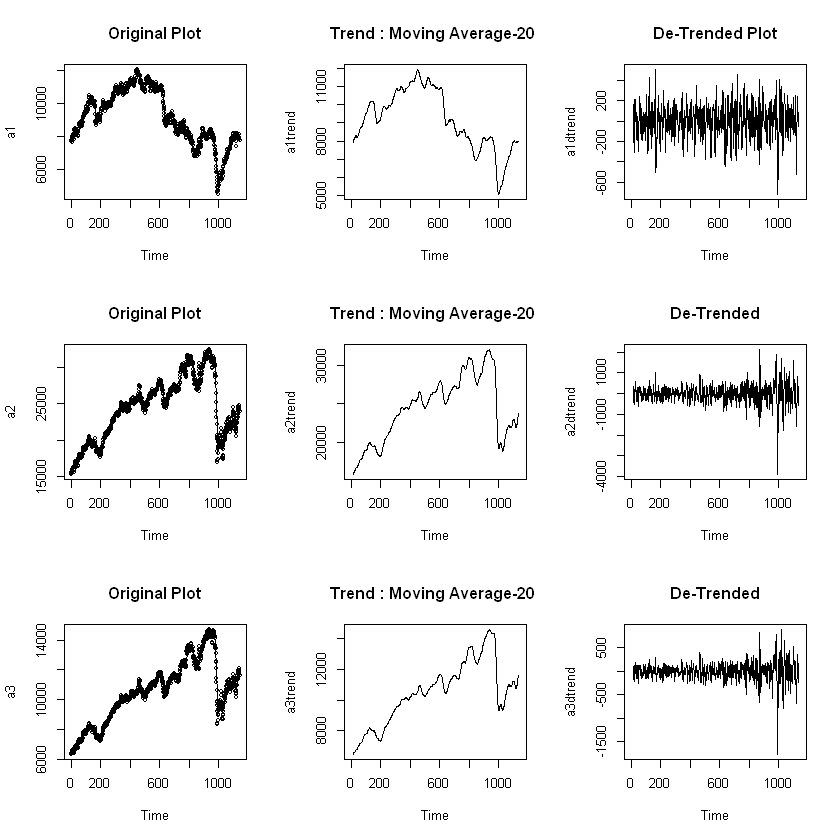

In [71]:
a1= data_assets$ASSET_1
a1=ts(a1)
a1trend=ma(a1,order=20,centre = T)


a2= data_assets$ASSET_2
a2=ts(a2)
a2trend=ma(a2,order=20,centre = T)

a3= data_assets$ASSET_3
a3=ts(a3)
a3trend=ma(a3,order=20,centre = T)


par(mfrow=c(3,3))
plot(a1,type="b",main = "Original Plot")
lines(a1trend)
a1dtrend=a1-a1trend
plot(a1trend,main = "Trend : Moving Average-20 ")
plot(a1dtrend, main= "De-Trended Plot")

plot(a2,type="b", main = "Original Plot")
lines(a2trend)
a2dtrend=a2-a2trend
plot(a2trend, main = "Trend : Moving Average-20 ")
plot(a2dtrend, main= "De-Trended")

plot(a3,type="b", main = "Original Plot")
lines(a3trend)
a3dtrend=a3-a3trend
plot(a3trend, main = "Trend : Moving Average-20 ")
plot(a3dtrend, main = "De-Trended")

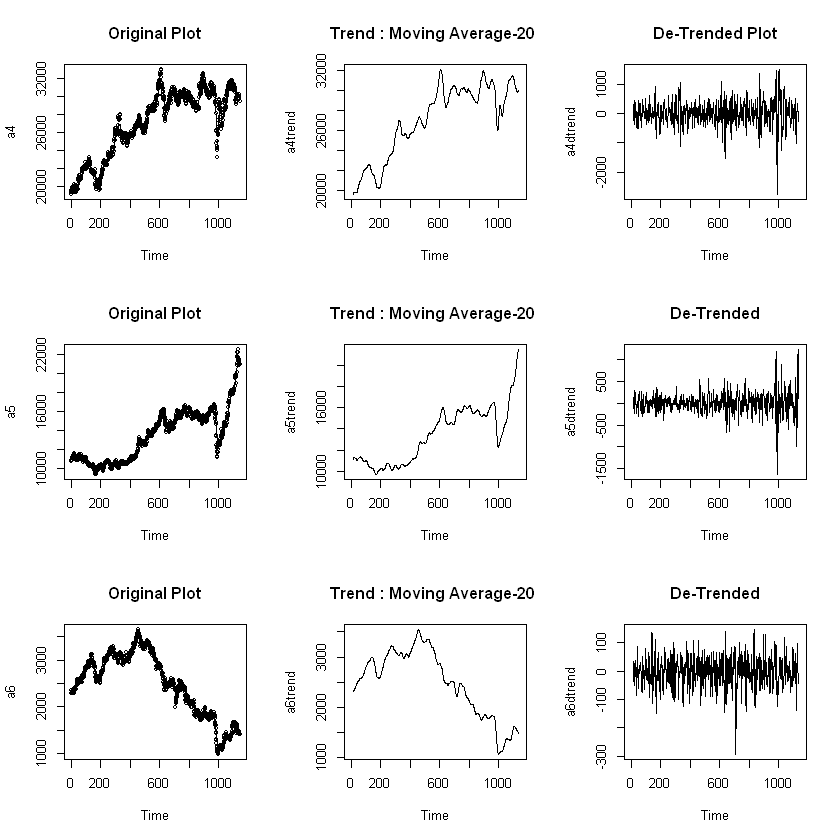

In [72]:
a4= data_assets$ASSET_4
a4=ts(a4)
a4trend=ma(a4,order=20,centre = T)

a5= data_assets$ASSET_5
a5=ts(a5)
a5trend=ma(a5,order=20,centre = T)

a6= data_assets$ASSET_6
a6=ts(a6)
a6trend=ma(a6,order=20,centre = T)

par(mfrow=c(3,3))

plot(a4,type="b",main = "Original Plot")
lines(a4trend)
a4dtrend=a4-a4trend
plot(a4trend,main = "Trend : Moving Average-20 ")
plot(a4dtrend, main= "De-Trended Plot")

plot(a5,type="b", main = "Original Plot")
lines(a5trend)
a5dtrend=a5-a5trend
plot(a5trend, main = "Trend : Moving Average-20 ")
plot(a5dtrend, main= "De-Trended")

plot(a6,type="b", main = "Original Plot")
lines(a6trend)
a6dtrend=a6-a6trend
plot(a6trend, main = "Trend : Moving Average-20 ")
plot(a6dtrend, main = "De-Trended")

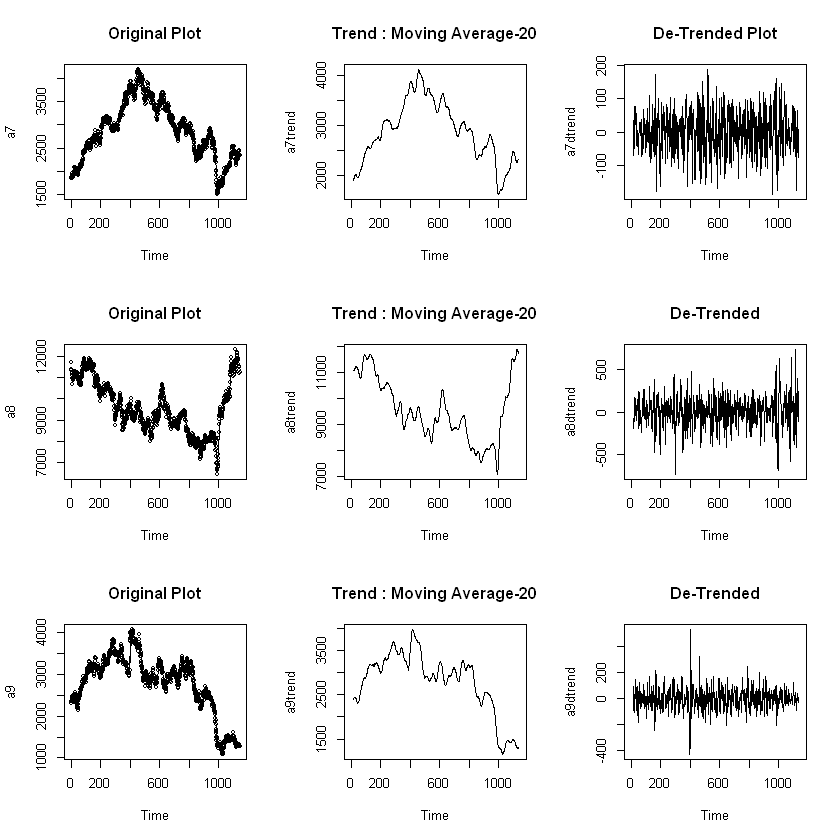

In [73]:
a7= data_assets$ASSET_7
a7=ts(a7)
a7trend=ma(a7,order=20,centre = T)

a8= data_assets$ASSET_8
a8=ts(a8)
a8trend=ma(a8,order=20,centre = T)

a9= data_assets$ASSET_9
a9=ts(a9)
a9trend=ma(a9,order=20,centre = T)

par(mfrow=c(3,3))
plot(a7,type="b",main = "Original Plot")
lines(a7trend)
a7dtrend=a7-a7trend
plot(a7trend,main = "Trend : Moving Average-20")
plot(a7dtrend, main= "De-Trended Plot")

plot(a8,type="b", main = "Original Plot")
lines(a8trend)
a8dtrend=a8-a8trend
plot(a8trend, main = "Trend : Moving Average-20")
plot(a8dtrend, main= "De-Trended")

plot(a9,type="b", main = "Original Plot")
lines(a9trend)
a9dtrend=a9-a9trend
plot(a9trend, main = "Trend : Moving Average-20")
plot(a9dtrend, main = "De-Trended")

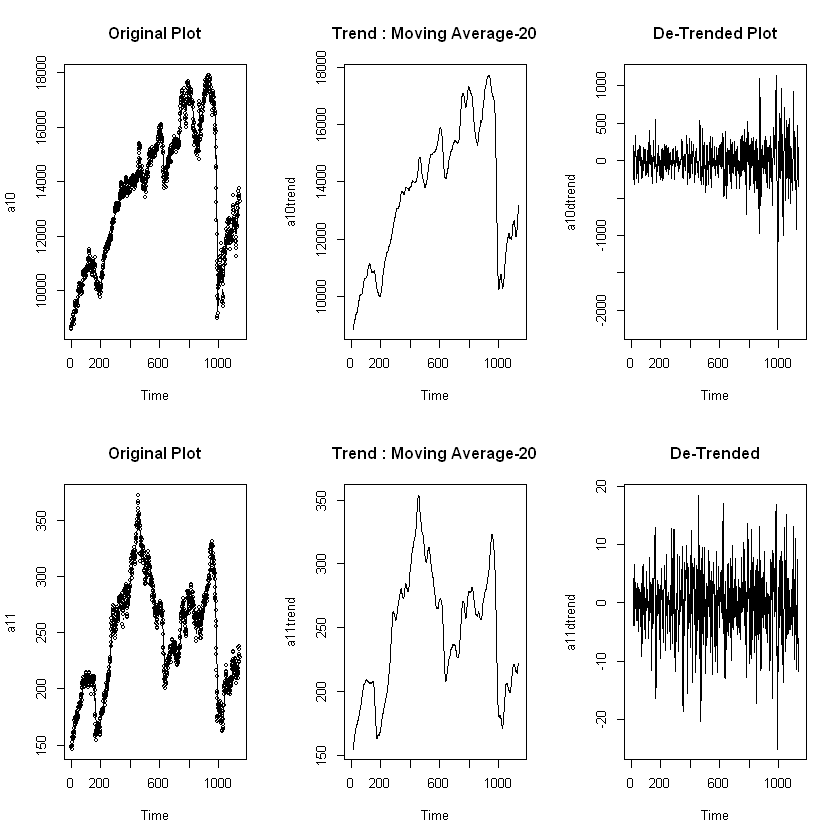

In [74]:
a10= data_assets$ASSET_10
a10=ts(a10)
a10trend=ma(a10,order=20,centre = T)

a11= data_assets$ASSET_11
a11=ts(a11)
a11trend=ma(a11,order=20,centre = T)

par(mfrow=c(2,3))
plot(a10,type="b",main = "Original Plot")
lines(a10trend)
a10dtrend=a10-a10trend
plot(a10trend,main = "Trend : Moving Average-20")
plot(a10dtrend, main= "De-Trended Plot")

plot(a11,type="b", main = "Original Plot")
lines(a11trend)
a11dtrend=a11-a11trend
plot(a11trend, main = "Trend : Moving Average-20")
plot(a11dtrend, main= "De-Trended")

MAi is moving average of i-th Asset

In [76]:
data_assets$MA1= TTR::SMA(data_assets$ASSET_1,n=20)
data_assets$MA2= TTR::SMA(data_assets$ASSET_2,n=20)
data_assets$MA3= TTR::SMA(data_assets$ASSET_3,n=20)
data_assets$MA4= TTR::SMA(data_assets$ASSET_4,n=20)
data_assets$MA5= TTR::SMA(data_assets$ASSET_5,n=20)
data_assets$MA6= TTR::SMA(data_assets$ASSET_6,n=20)
data_assets$MA7= TTR::SMA(data_assets$ASSET_7,n=20)
data_assets$MA8= TTR::SMA(data_assets$ASSET_8,n=20)
data_assets$MA9= TTR::SMA(data_assets$ASSET_9,n=20)
data_assets$MA10= TTR::SMA(data_assets$ASSET_10,n=20)
data_assets$MA11= TTR::SMA(data_assets$ASSET_11,n=20)
head(data_assets,n=2)


Dates,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,...,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11
14-03-2016,7777.15,15277.8,6374.15,19535.15,10866.85,2343.0,1843.85,11719.2,2311.4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
15-03-2016,7711.10,15326.8,6321.75,19136.45,10730.45,2281.4,1849.75,11325.6,2349.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [81]:
col=names(data_assets)
col[13:23]
index=data_assets[-c(2:12)]

[1] "MA1"  "MA2"  "MA3"  "MA4"  "MA5"  "MA6"  "MA7"  "MA8"  "MA9"  "MA10"
[11] "MA11"

index is a dataframe containing values of Moving Average of order 20 which are used as Trend

In [82]:
#Building data frame of MA only
index_ma=index[-c(1:20),]
head(index_ma,n=5)

,Dates,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11
21,13-04-2016,7937.163,15797.93,6484.172,19612.43,11164.32,2309.795,1895.698,11063.59,2404.848,8885.735,155.4225
22,18-04-2016,7970.915,15842.73,6500.612,19668.31,11207.66,2315.130,1902.548,11063.21,2406.825,8914.856,156.5975
23,20-04-2016,8004.400,15887.13,6516.242,19713.80,11245.14,2319.740,1914.338,11057.50,2410.098,8942.351,157.7875
24,21-04-2016,8037.285,15946.79,6537.582,19745.09,11266.73,2323.625,1926.255,11062.16,2417.318,8977.649,158.8975
25,22-04-2016,8069.000,15999.21,6554.117,19761.15,11273.95,2327.022,1935.457,11071.88,2425.048,9007.844,159.8500


In [83]:
#index  will be used for efficient Frontier in next section
index2=index_ma %>% dplyr::filter(row_number() %% 20 == 7) ## Selecting monthly avg
head(index2,n=5)

Dates,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11
26-04-2016,8117.235,16090.17,6577.007,19764.59,11290.56,2334.927,1951.672,11073.27,2432.040,9064.974,161.2900
24-05-2016,8202.900,16608.73,6781.645,19769.73,11060.78,2465.070,1968.208,11180.67,2329.055,9439.654,174.0950
21-06-2016,8649.700,17642.71,7187.545,20881.23,11360.63,2565.878,2066.218,10815.02,2496.482,10056.785,185.4825
20-07-2016,8941.245,18206.34,7442.930,21660.37,11046.78,2619.213,2255.500,11344.32,2798.867,10287.721,200.4875
18-08-2016,9496.977,18866.81,7778.017,22169.24,11019.58,2789.402,2476.945,11601.37,2888.735,10640.114,208.2775


index2 is aggregate of monthly data points, which will be used for finding efficient portfolio

In [84]:
tail(index2, n=5)

,Dates,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11
53,9/7/2020,6766.788,21534.49,10628.81,29675.76,14843.67,1369.707,2013.618,10024.99,1451.765,11827.86,206.2325
54,6/8/2020,7220.190,21977.48,10915.30,31039.03,17231.43,1336.880,2129.680,10512.59,1428.307,12055.39,199.6225
55,3/9/2020,7891.188,22745.64,11161.26,31419.38,18090.93,1524.060,2465.223,11536.46,1480.807,12453.11,217.9850
56,1/10/2020,7908.568,21965.21,10756.18,30224.28,19308.21,1585.957,2314.488,11569.46,1367.440,12112.19,215.8525
57,30-10-2020,7975.143,23807.86,11640.81,29891.55,21437.42,1483.765,2322.547,11710.06,1295.585,13191.03,222.2625


***2.2 Problem-2 	In any approach you’ve chosen to take in the previous question (there are many), what do you think are the shortcomings of the approach?***

Possible shortcomings of this are:

Moving averages draws trends from past price. It doesn't account for fundamentals of an asset

Ideally, a moving average will show a consistent change in the price of a security over time. However, since every asset has unique price histories and levels of volatility, there are no uniform rules that can be applied across all markets.

It is limited to a particular chosen window

Every day cannot be given same weight while calculating Mean

There is no statistical evidence of a consistent impact of past, if price of an asset follows markovian property, this model will not be a good fit.

Some assets are showing high Volatility, moving averages are not a good fit for them.

The purpose of any trend is to predict where the price of a security will be in the future. However, if a security is not trending in either direction, it doesn't provide a true picture.

# 3. Building Efficient Frontier

In [85]:
index=index2 #for simplicity re-naming index2 as index

***Methods Tried: ***

For expected Returns first tried ARIMA models on all the Assets, basis Daily return, weekly rolling returns, monthly rolling returns, but all did not pass the three tests for stationarity and Fit: 	Augmented Dickey-Fuller Test, KPSS test and Box-Pierce test. 
Hence, decided to go for rolling returns on monthly aggregated data.

Aggregated data is taken basis of 20-trading day window, since it is a 5-day week , rather than matching exact date of every month 

For Volatility tried finding implied Volatility through GARCH model, but all did not pass Vol Clustering and ARCH test, therefore, looked at Historical Standard Deviation.

***Assumptions:***
1. Given lack of any details on assets and macroeconomic factors, assigned equal probabilty to monthly rolls of all assets.
2. We can take Long Positions only

***3.1 Problem-3.	Given the set of 11 assets, plot the Efficient Frontier, assuming a Risk Free Rate of 0%.***

In [13]:
str(index)
library(timeSeries)
index=timeSeries(index[,-1])
class(index)

'data.frame':	57 obs. of  12 variables:
 $ Dates: Factor w/ 1147 levels "1/1/2018","1/1/2019",..: 671 606 494 461 356 395 399 329 254 109 ...
 $ MA1  : num  8117 8203 8650 8941 9497 ...
 $ MA2  : num  16090 16609 17643 18206 18867 ...
 $ MA3  : num  6577 6782 7188 7443 7778 ...
 $ MA4  : num  19765 19770 20881 21660 22169 ...
 $ MA5  : num  11291 11061 11361 11047 11020 ...
 $ MA6  : num  2335 2465 2566 2619 2789 ...
 $ MA7  : num  1952 1968 2066 2255 2477 ...
 $ MA8  : num  11073 11181 10815 11344 11601 ...
 $ MA9  : num  2432 2329 2496 2799 2889 ...
 $ MA10 : num  9065 9440 10057 10288 10640 ...
 $ MA11 : num  161 174 185 200 208 ...


[1] "timeSeries"
attr(,"package")
[1] "timeSeries"

In [10]:
help(portfolioSpec)

In [33]:
spec=portfolioSpec() #Markowitz
setTargetReturn(spec)=0.015#Randomly chosen doesn't impact end result
setRiskFreeRate(spec)=0.00 # Important
setNFrontierPoints(spec)=100 # Set for better plot

In [34]:
spec


Model List:	
 Type:                      MV
 Optimize:                  minRisk
 Estimator:                 covEstimator
 Params:                    alpha = 0.05

Portfolio List:	
 Portfolio Weights:         NA
 Target Return:             0.015
 Target Risk:               NA
 Risk-Free Rate:            0
 Number of Frontier Points: 100

Optim List:	
 Solver:                    solveRquadprog
 Objective:                 portfolioObjective portfolioReturn portfolioRisk
 Options:                   meq = 2
 Trace:                     FALSE

In [20]:
indexreturns=returns(index)

In [87]:
dim(indexreturns)

[1] 56 11

In [22]:
dim(index)

[1] 57 11

In [35]:
xyz= portfolioFrontier(indexreturns, spec = spec, constraints = "LongOnly",
    include.mvl = TRUE, title = NULL, description = NULL)
xyz # efficient frontier


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  5 of 99 

Portfolio Weights:
      MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11
1  0.0000 0.0000 0.0000 0.0000 0.0000 0.0728 0.0000 0.0000 0.9272 0.0000 0.0000
25 0.0000 0.0000 0.0000 0.0000 0.0000 0.2257 0.0000 0.4100 0.3643 0.0000 0.0000
50 0.0000 0.0000 0.0000 0.3150 0.0000 0.0759 0.0000 0.4372 0.1718 0.0000 0.0000
74 0.0000 0.0000 0.0000 0.6753 0.0388 0.0000 0.0000 0.2859 0.0000 0.0000 0.0000
99 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

Covariance Risk Budgets:
      MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11
1  0.0000 0.0000 0.0000 0.0000 0.0000 0.0472 0.0000 0.0000 0.9528 0.0000 0.0000
25 0.0000 0.0000 0.0000 0.0000 0.0000 0.2611 0.0000 0.2478 0.4911 0.0000 0.0000
50 0.0000 0.0000 0.0000 0.2119 0.0000 0.1047

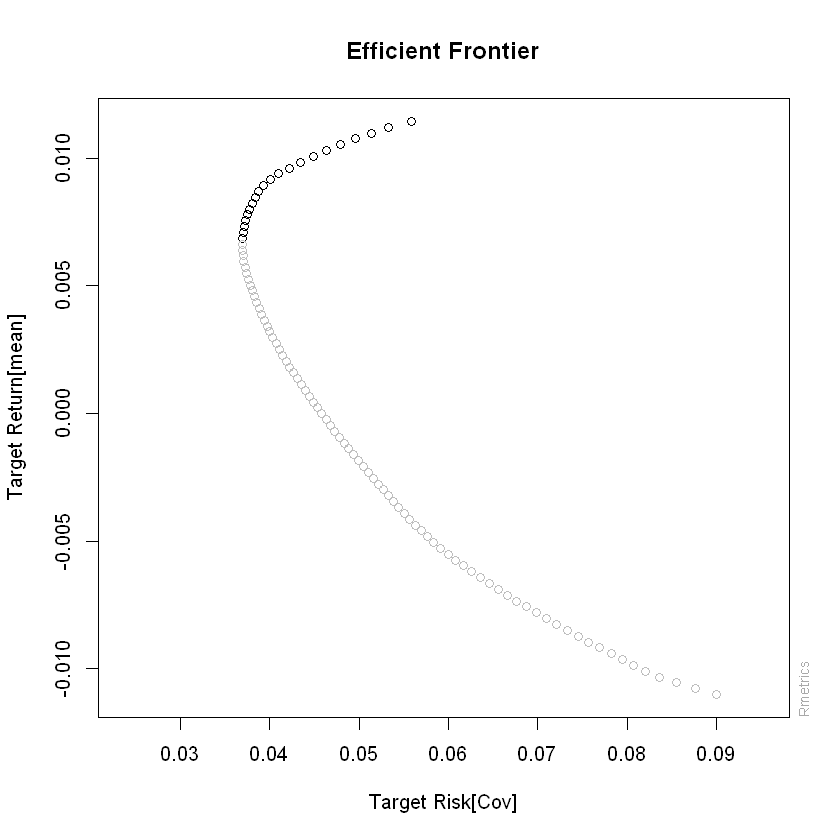

In [50]:

frontierPlot(xyz, frontier = c("both", "lower", "upper"),
    col = c("black", "grey"), add = FALSE, labels = TRUE,
    return = c("mean", "mu"), risk = c("Cov", "Sigma", "CVaR", "VaR"),
    auto = TRUE, title = TRUE) 

***3.2 Problem-4.	For the same 11 assets, identify the following portfolios:***

                a.	Minimum Variance Portfolio
                
                b.	Tangency Portfolio


In [64]:
Min_Var_portfolio=minvariancePortfolio(indexreturns, spec, constraints = "LongOnly")
Min_Var_portfolio


Title:
 MV Minimum Variance Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
   MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11 
0.0000 0.0000 0.0000 0.6852 0.1159 0.0000 0.0000 0.1989 0.0000 0.0000 0.0000 

Covariance Risk Budgets:
   MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11 
0.0000 0.0000 0.0000 0.6852 0.1159 0.0000 0.0000 0.1989 0.0000 0.0000 0.0000 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0066 0.0369 0.0922 0.0411 

Description:
 Sun Nov 01 10:45:57 2020 by user: kamal 

In [90]:
tangency_portfolio=tangencyPortfolio(indexreturns, spec = spec, constraints = "LongOnly")
tangency_portfolio


Title:
 MV Tangency Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
   MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11 
0.0000 0.0000 0.0000 0.5209 0.4791 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 

Covariance Risk Budgets:
   MA1    MA2    MA3    MA4    MA5    MA6    MA7    MA8    MA9   MA10   MA11 
0.0000 0.0000 0.0000 0.4122 0.5878 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0093 0.0408 0.1048 0.0312 

Description:
 Sun Nov 01 14:27:55 2020 by user: kamal 

In [158]:
header=names(data_assets)[2:12]

Min_Var_weights=getWeights(Min_Var_portfolio)
tangency_weights=getWeights(tangency_portfolio)

wt= data.frame("MIN_VAR_wt" = Min_Var_weights, "Tan_wt" = tangency_weights)
t_wt = transpose(wt)
rownames(t_wt) <- c("Min_Var_wt", "Tangency_wt")
colnames(t_wt) <- c(header)
t_wt

,ASSET_1,ASSET_2,ASSET_3,ASSET_4,ASSET_5,ASSET_6,ASSET_7,ASSET_8,ASSET_9,ASSET_10,ASSET_11
Min_Var_wt,0,0,0,0.6852182,0.1158540,0,0,0.1989278,0,0,0
Tangency_wt,0,0,0,0.5208515,0.4791485,0,0,0.0000000,0,0,0


***3.3 Problem-5.	Show the above 2 portfolios on the Efficient Frontier plot.***

[1] "Efficient Frontier with Min Variance Point"


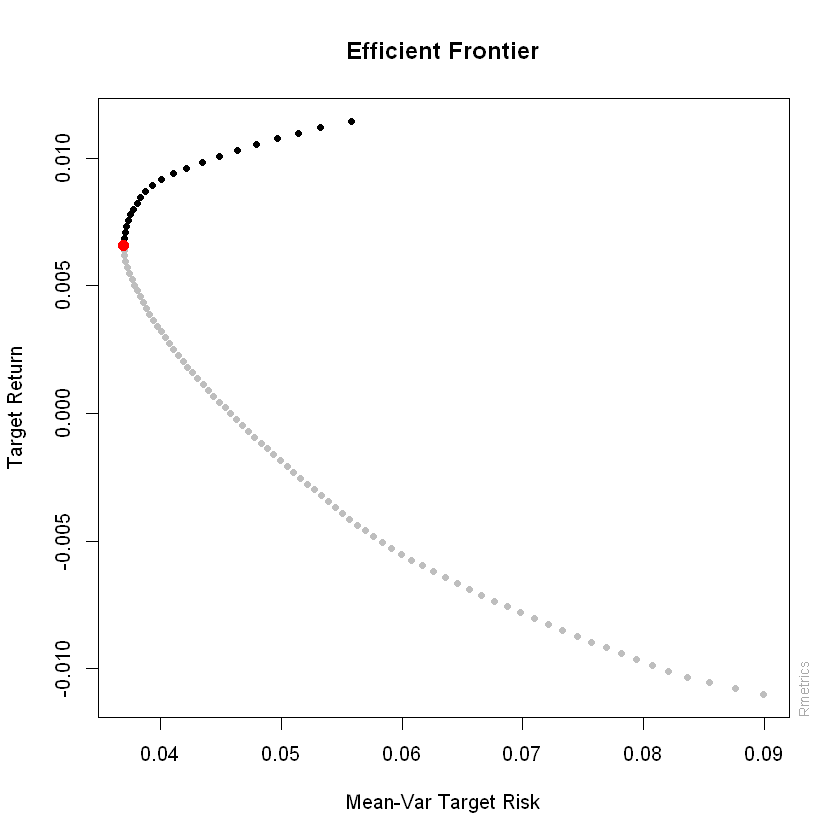

In [57]:
print("Efficient Frontier with Min Variance Point")
plot(xyz, c(1,2))

[1] "Efficient Frontier with Min Variance Point and Tangency Portfolio"


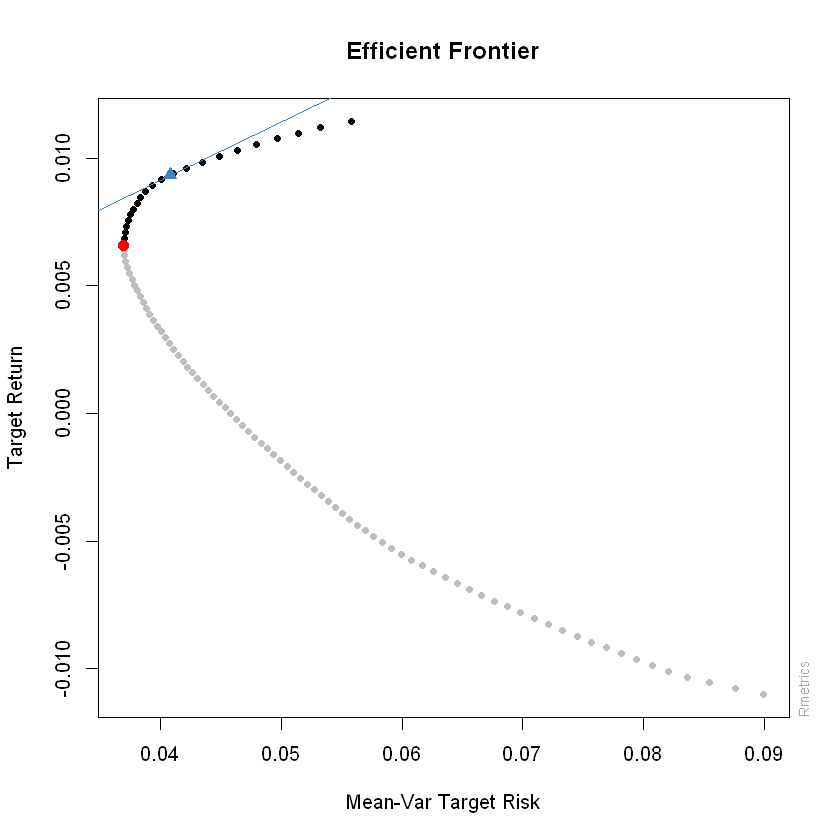

In [58]:
print("Efficient Frontier with Min Variance Point and Tangency Portfolio")
plot(xyz, c(1,2,3))

In [59]:
help(efficientPortfolio)

***3.4 Problem-6 Write a short note on what aspect of this assignment did you find challenging ***

The most challenging aspect was assigning probabilities to different time periods, for finding expected returns and Standard Deviation because of lack of data on macroeconomic factors.

Another challenge was choosing a period for finding Moving averages, given the amount of data available decided against going for 60-day window(quarter) and 5-day window(week) seemed short, hence 20-day window was chosen.